In [1]:
import sqlite3 as sq
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def connect():
  connection = sq.connect("..\..\FoodHub\db.sqlite3")
  cursor = connection.cursor()

  return connection, cursor

In [3]:
INGREDIENTS = [
  "apple", "banana", "beef", "bread", "broccoli", "butter", "carrot", "cheese", "chicken", "chocolate",
  "cinnamon", "corn", "cucumber", "egg", "eggplant", "fish", "garlic", "ginger", "lemon", "mushroom",
  "olives", "onion", "orange", "parsley", "pasta", "peas", "potato", "rice", "spinach", "tomato"
]

In [4]:
def extract_meals_ingredients(meals_ingredients):
  ingredients = []

  for meal_ingredient in meals_ingredients:
    for _, ingredient in enumerate(INGREDIENTS):
      if ingredient in meal_ingredient:
        ingredients.append(ingredient)

  return ingredients

In [5]:
def get_meals_ingredients():
  _, cursor = connect()

  sql = "SELECT ingredients FROM pages_meal"

  cursor.execute(sql)

  meals = cursor.fetchall()

  meals_count = len(meals)
  print(f"Number of meals: {meals_count}")
  
  meals_ingredients = [ingredients for ingredients, in meals]
  meals_ingredients = extract_meals_ingredients(meals_ingredients)
  ingredients_count = len(meals_ingredients)
  print(f"Number of ingredients: {ingredients_count}")

  data = pd.DataFrame(meals_ingredients, columns = ["ingredient"])

  return data

In [6]:
data = get_meals_ingredients()

data.head()

Number of meals: 1000
Number of ingredients: 3117


,ingredient
0,apple
1,bread
2,butter
3,chicken
4,corn


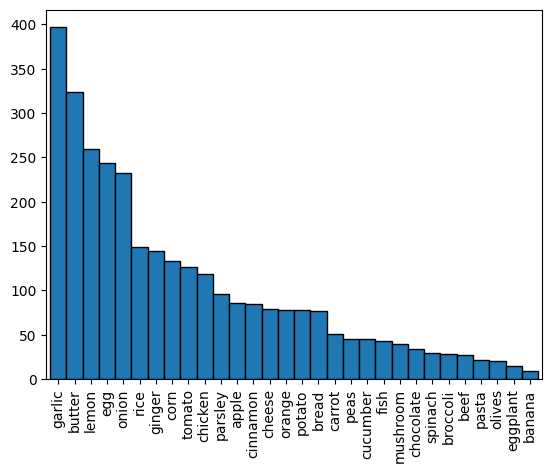

In [7]:
def show_ingredients_countplot(ingredients_data):
  ingredients_data.value_counts().plot(kind = "bar", edgecolor = "black", width = 1)
  
  plt.xlabel("")

show_ingredients_countplot(data["ingredient"])

In [8]:
def get_orders_ingredients():
  _, cursor = connect()

  sql = '''
    SELECT quantity, ingredients
    FROM cart_order
    INNER JOIN pages_meal ON cart_order.meal_id = pages_meal.id
  '''

  cursor.execute(sql)

  orders = cursor.fetchall()
  
  orders_ingredients = []
  for quantity, ingredients in orders:
    orders_ingredients.extend([ingredients] * quantity)

  orders_ingredients = extract_meals_ingredients(orders_ingredients)

  data = pd.DataFrame(orders_ingredients, columns = ["ingredient"])

  return data

In [9]:
data = get_orders_ingredients()

data.head()

,ingredient
0,cheese
1,garlic
2,onion
3,cheese
4,garlic


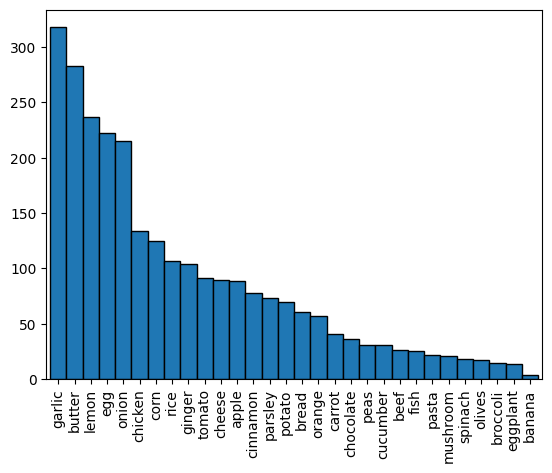

In [10]:
show_ingredients_countplot(data["ingredient"])

In [11]:
def get_orders_ingredients_by_user_age():
  _, cursor = connect()

  sql = '''
    SELECT quantity, ingredients, age
    FROM cart_order
    INNER JOIN pages_meal ON cart_order.meal_id = pages_meal.id
    INNER JOIN accounts_user ON cart_order.user_id = accounts_user.id
  '''

  cursor.execute(sql)

  orders = cursor.fetchall()
  
  orders_ingredients_by_user_age = []
  for quantity, ingredients, age in orders:
    orders_ingredients_by_user_age.extend([(ingredients, age)] * quantity)

  orders_ingredients = extract_meals_ingredients([ingredients for (ingredients, _) in orders_ingredients_by_user_age])

  orders_ingredients_by_user_age = zip(orders_ingredients, [age for (_, age) in orders_ingredients_by_user_age])

  data = pd.DataFrame(orders_ingredients_by_user_age, columns = ["ingredient", "age"])

  return data

In [12]:
data = get_orders_ingredients_by_user_age()

data.head()

,ingredient,age
0,cheese,24
1,garlic,24
2,onion,24
3,cheese,24
4,garlic,24


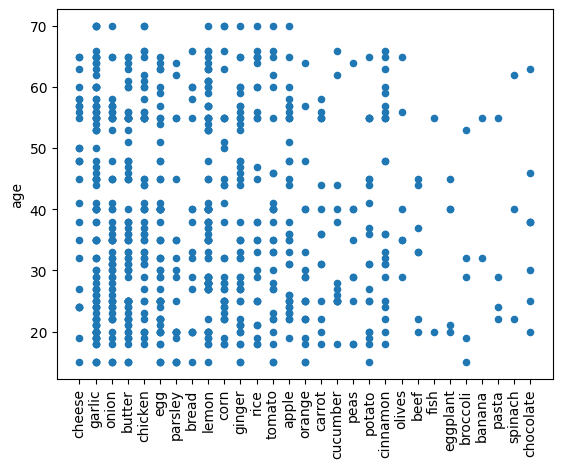

In [13]:
def show_orders_ingredients_by_user_age_scatter():
  data.plot(kind = "scatter", x = "ingredient", y = "age")
  
  plt.xlabel("")
  plt.xticks(rotation=90)

show_orders_ingredients_by_user_age_scatter()

In [14]:
def get_orders_ingredients_by_user_gender():
  _, cursor = connect()

  sql = '''
    SELECT quantity, ingredients, gender
    FROM cart_order
    INNER JOIN pages_meal ON cart_order.meal_id = pages_meal.id
    INNER JOIN accounts_user ON cart_order.user_id = accounts_user.id
  '''

  cursor.execute(sql)

  orders = cursor.fetchall()
  
  orders_ingredients_by_user_gender = []
  for quantity, ingredients, gender in orders:
    orders_ingredients_by_user_gender.extend([(ingredients, gender)] * quantity)

  orders_ingredients = extract_meals_ingredients([ingredients for (ingredients, _) in orders_ingredients_by_user_gender])

  orders_ingredients_by_user_gender = zip(orders_ingredients, [gender for (_, gender) in orders_ingredients_by_user_gender])

  data = pd.DataFrame(orders_ingredients_by_user_gender, columns = ["ingredient", "gender"])

  return data

In [15]:
data = get_orders_ingredients_by_user_gender()

data.head()

,ingredient,gender
0,cheese,male
1,garlic,male
2,onion,male
3,cheese,male
4,garlic,male


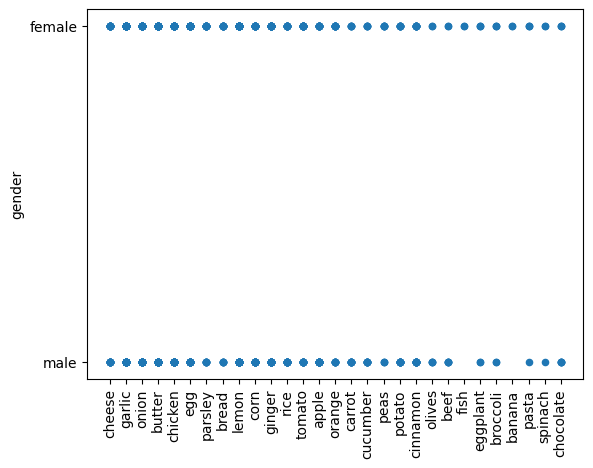

In [16]:
def show_orders_ingredients_by_user_gender_scatter():
  data.plot(kind = "scatter", x = "ingredient", y = "gender")
  
  plt.xlabel("")
  plt.xticks(rotation=90)

show_orders_ingredients_by_user_gender_scatter()

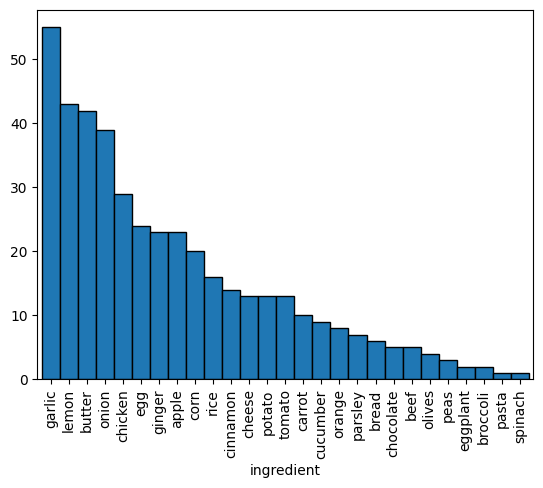

In [17]:
def show_orders_ingredients_by_males_countplot():
  data["ingredient"][data["gender"] == "male"].value_counts().plot(kind = "bar", edgecolor = "black", width = 1)

show_orders_ingredients_by_males_countplot()

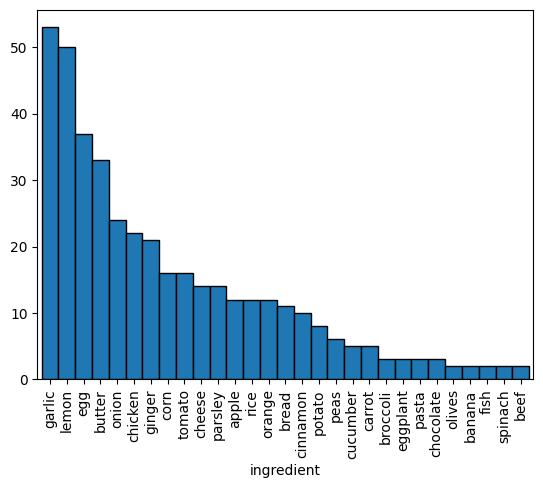

In [18]:
def show_orders_ingredients_by_females_countplot():
  data["ingredient"][data["gender"] == "female"].value_counts().plot(kind = "bar", edgecolor = "black", width = 1)

show_orders_ingredients_by_females_countplot()